In [1]:
import sys
sys.path.append("..")

# Установка

## * Непосредственно в систему

Для того, чтобы установить программу или обновить ее версию, перейдите в [https://github.com/heinwol/sponge-networks/releases/](https://github.com/heinwol/sponge-networks/releases/) и скачаете (из последней версии) файл с расширением `.whl`, например (старая версия):

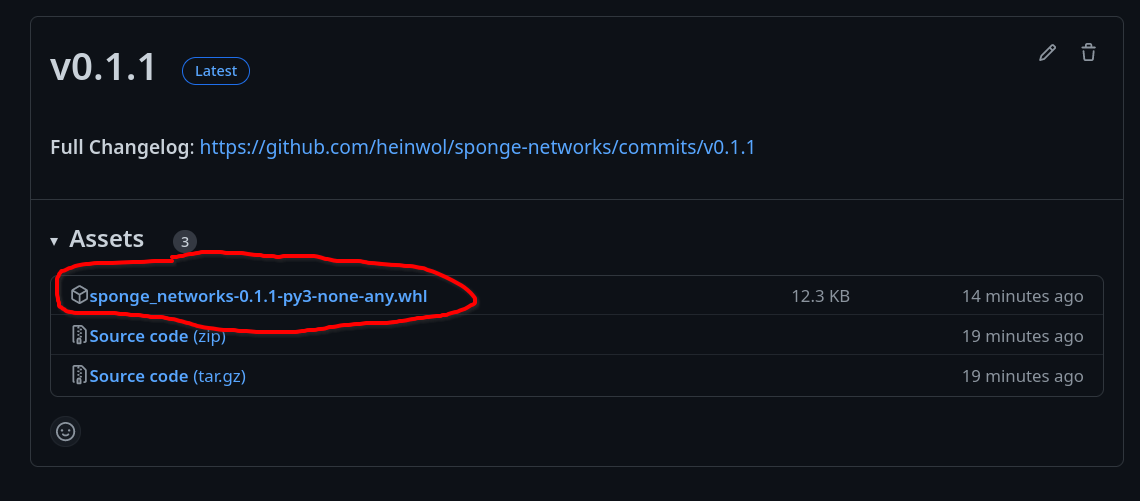

Затем откройте в папке с загрузками git bash и напишите `pip install <имя файла>`, например:

```console
pip install sponge_networks-0.2.2-py3-none-any.whl
```

## * С помощью Docker

Подробная инструкция по установке самого Docker'а, юпитера и sponge networks находится по [ссылке](https://github.com/heinwol/sponge-networks/blob/main/docker/instruction.md)

# Обновление

## * В системе

Для обновления библиотеки, установленной в систему, достаточно повторить те же шаги, что и с установкой его с нуля, только с более новой версией: нужно скачать файл `*.whl` и написать в консоли `pip install *.whl`, а менеджер пакетов pip уже сам разберется с остальным (это если не вознкикнет непредвиденных обстоятельств, хаха)

## * В Docker

Для того, чтобы обновить пакет Docker'а, не требуется переустанавливать всю подсистему Docker и образ с jupyter notebook с нуля. В сущности, можно произвести те же действия, что и с обновлением системной установки библиотеки, только консоль нудо открывать не системную, а консоль внутри Docker-образа. Сделать это можно так:

- Открыть юпитер согласно инструкции
- В юпитере открыть новую вкладку, появится launcher
- В меню лаунчера выбрать кнопку "Terminal"
- Вуаля, открылась консоль

Дальше можно было бы действовать так же как и в случае системной установки: скачать файл, написать `pip install` и т.п. Однако, учитывая неудобство взаимодействия с системными файлами через jupyter, можно воспользоваться функцией `pip`, которая позволяет устанавливать библиотеки непосредственно из интернета. В консоли, таким образом, можно просто прописать
```console
pip install https://github.com/heinwol/sponge-networks/releases/download/v0.4.0/sponge_networks-0.4.0-py3-none-any.whl
```
Это ссылка на тот же самый файл, что мы бы и скачали с окна релизов в github. Такой командой можно обновиться до любой версии, надо только заменить `0.4.0` на последнюю версию в https://github.com/heinwol/sponge-networks/releases/ 

---

Обновить версию текущего файла (`doc.ipynb`) можно там же (скачать новую версию файла `doc.ipynb`)

Либо же перейдите по [ссылке](https://raw.githubusercontent.com/heinwol/sponge-networks/main/jupyter/doc.ipynb). В браузере откроется сам файл, вам останется только нажать "сохранить как..." в браузере. Это всегда будет самая новая версия документации, в отличие от приложенной в релиз

# Использование

После установки, пакет `sponge_networks` будет доступен по всей системе. Для того, чтобы им воспользоваться, стоит импортировать его:

In [2]:
import sponge_networks as sn

В дальнейшей работе нам, вероятно, понадобятся еще библиотеки, включая `networkx`, их тоже импортируем:

In [3]:
import numpy as np
import networkx as nx
import pandas as pd

Важная подсказка для пользования jupyter lab:
 - если нажать `Tab` во время написания названия какого-либо члена какого-либо объекта, то можно узнать, какие члены вообще есть у этого объекта. Так, если начать писать `np.<TAB>`, то можно узнать про все члены модуля `numpy`, а если писать `np.zer<TAB>`, то можно узнать, какие члены `np` начинаются на `zer`;
 - если нажать `Shift+Tab`, пока курсор находится названии некоторого объекта, то можно узнать дополнительную информацию о нем. Так, можно узнать информацию про модуль `np` или же про функцию из этого модуля `np.zeros`:

In [4]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Интерфейс `sponge_networks`

На самом деле, в библиотеке есть несколько понятий (классов) ресурсной сети.

- Во-первых, это, собственно, `sn.ResourceNetwork` -- сама модель (произвольной) ресурсной сети, которая используется в качестве основы для всего остального. Ресурсную сеть можно задавать с помощью графа (`networkx.DiGraph`) и проводить с ней произвольные модификации (правда, через несколько нетривиальный программный интерфейс). Конечно же, можно рисовать ресурсную сеть и проводить различные симуляции с различными начальными состояниями. Также есть некоторые дополнительные возможности. Например, можно посчитать предельное состояние при единичном ресурсе в сети ($q_1^{*}$), пороговое значение ресурса ($T$), входящий и исходящий поток.
  - Стоит отметить, что при использовании указанных "дополнительных возможностей" возвращаться будут массивы без указания индексов, что может составлять проблему при работе с сетями, у которых вершины нумеруются не последовательными натуральными числами, а как-то иначе. Например, парами натуральных чисел.

- Во-вторых, реализованы модификации обычной ресурсной сети: `sn.ResourceNetworkGreedy` -- сеть с жадными вершинами, `sn.ResourceNetworkWithIncome` -- сеть с приходящим ресурсом. Интерфейс данных классов абсолютно аналогичен обычной ресурсной сети (`sn.ResourceNetwork`), в них просто переопределено правило распределения ресурса при запуске симуляции. Однако другие методы переопределены не были, поэтому, например, функция для вычисления порогового значения ресурса будет рассматривать ресурсную сеть с жадными вершинами как обычную, поэтому результат будет некорректным

- В-третьих, собственно, сама губковая сеть -- `sn.SpongeNetwork`. Она содержит в себе поле `sn.SpongeNetwork.resource_network`, которое является ресурсной сетью с жадными вершинами. То есть, `sn.SpongeNetwork` -- в некотором смысле "обертка" над ресурсной сетью с жадными вершинами. Кстати, довольно легко сделать так, чтобы это была ресурсная сеть с обычными вершинами или с пребывающим ресурсом. `resource_network` является самодостаточной ресурсной сетью, с которой можно проводить все операции, допускаемые ресурсной сетью. Однако для модификации внутреннего графа стоит воспользоваться специальной функцией (пока не реализовано, но это быстро)

Все недостатки, указанные выше, можно устранить, это не слишком сложно

### Ресурсные сети

Для создания произвольной ресурсной сети можно передать произвольный направленный граф (`nx.DiGraph`) в конструктор `sn.ResourceNetwork`: 

In [5]:
graph = nx.from_numpy_array(np.array([
    [1, 2, 0],
    [3, 0, 0],
    [4, 1, 1]
]), create_using=nx.DiGraph)
nw = sn.ResourceNetwork(graph)
nw

ResourceNetwork(adjacency_matrix=array([[1, 2, 0],
                                        [3, 0, 0],
                                        [4, 1, 1]]),
                idx_descriptor=[0, 1, 2])

Если стандартный способ отображения ресурсной сети не подходит, можно ее нарисовать:

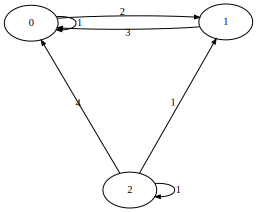

In [6]:
nw.plot(scale=1.3)

Явно выписать матрицу смежности:

In [7]:
nw.adjacency_matrix

array([[1, 2, 0],
       [3, 0, 0],
       [4, 1, 1]])

Например, получить предельное состояние при единичном ресурсе можно вот так:

In [8]:
nw.one_limit_state()

array([ 6.0000000e-01,  4.0000000e-01, -1.3848857e-16])

### Симуляции

Основная ценность ресурсных сетей состоит в симуляциях. Симуляция -- отдельный класс в `sponge_networks`, а именно `sn.utils.StateArray`. Именно он и возвращается, когда мы запускаем симуляцию ресурсной сети. Функция для запуска симуляции -- `sn.ResourceNetwork.run_simulation`:

In [9]:
sim = nw.run_simulation([5, 5, 5], n_iters=10)
sim

StateArray(node_descriptor={0: 0, 1: 1, 2: 2}, idx_descriptor=[0, 1, 2], states_arr=array([[5.00000000e+00, 5.00000000e+00, 5.00000000e+00],
       [9.33333333e+00, 4.83333333e+00, 8.33333333e-01],
       [1.08888889e+01, 3.97222222e+00, 1.38888889e-01],
       [1.19814815e+01, 2.99537037e+00, 2.31481481e-02],
       [1.29922840e+01, 2.00385802e+00, 3.85802469e-03],
       [1.29987140e+01, 2.00064300e+00, 6.43004115e-04],
       [1.29997857e+01, 2.00010717e+00, 1.07167353e-04],
       [1.29999643e+01, 2.00001786e+00, 1.78612254e-05],
       [1.29999940e+01, 2.00000298e+00, 2.97687090e-06],
       [1.29999990e+01, 2.00000050e+00, 4.96145151e-07]]), total_output_res=array([3, 3, 6]))

Как можно видеть, `StateArray` содержит в себе информацию о каждом шаге симуляции (поле `states_arr`) -- основная информация, которая нам нужна.

#### Нумерация вершин в симуляции

Первый параметр в `sn.ResourceNetwork.run_simulation` -- массив, i-ый элемент которого будет являться начальным состоянием вершины под номером i. Первый параметр может также быть словарем, об этом скажем ниже. В случае, если вершины графа суть натуральные числа от 0 до n-1, то нумерация вершин тривиальна. Если же вершины представляют из себя более сложные объекты (например, пары натуральных чисел), то для понимания того, какая вершина идет под каким номером, следует обратиться к свойству `sn.ResourceNetwork.idx_descriptor`:

In [10]:
nw.idx_descriptor

[0, 1, 2]

Здесь i-ым элементом массива является вершина, номер которой равен i.

#### Отображение протокола

Симуляцию можно превратить в `pd.DataFrame`, который красиво отображается в jupyter:

In [11]:
df = sim.simple_protocol()
df

,0,1,2
t,,,
0,5.000000,5.000000,5.000000e+00
1,9.333333,4.833333,8.333333e-01
2,10.888889,3.972222,1.388889e-01
3,11.981481,2.995370,2.314815e-02
4,12.992284,2.003858,3.858025e-03
5,12.998714,2.000643,6.430041e-04
6,12.999786,2.000107,1.071674e-04
7,12.999964,2.000018,1.786123e-05
8,12.999994,2.000003,2.976871e-06


Его также можно записать в экселевский файл:

In [12]:
sim.to_excel("some_filename.xlsx")

#### Рисование симуляции ресурсной сетью:

здесь `scale` отвечает за масштаб (1 -- нормальный масштаб)

In [13]:
nw.plot_simulation(sim, scale=1.4)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=9), Output(layout=Layout(height='26…

### Губковые сети

Для создания губковой сети можно воспользоваться специальной функцией:

In [14]:
nw = sn.build_sponge_network(
    grid_type="grid_2d", n_cols=2, n_rows=2,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 4,
        "weights_up_down": 5,
        "weights_down_up": 1,
        "generate_sinks": False,
    },
)
nw

Здесь `grid_type` -- тип сети, может принимать значения `'triangular', 'hexagonal', 'grid_2d'`, а `generate_sinks` -- маркер того, нужно ли создавать стоки (по умолчанию `True`)

Напомню, что губковая сеть -- лишь небольшая обертка над обычной ресурсной сетью, а не ее наследник. Поэтому она не обладает всеми теми же полями и методами, что и ресурсная сеть. Однако можно напрямую обратиться к сети, чтобы получить указанные данные:

In [15]:
nw.resource_network.adjacency_matrix

array([[1, 1, 0, 4, 0, 0, 0, 0, 0],
       [5, 1, 1, 0, 4, 0, 0, 0, 0],
       [0, 5, 1, 0, 0, 4, 0, 0, 0],
       [4, 0, 0, 1, 1, 0, 4, 0, 0],
       [0, 4, 0, 5, 1, 1, 0, 4, 0],
       [0, 0, 4, 0, 5, 1, 0, 0, 4],
       [0, 0, 0, 4, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 4, 0, 5, 1, 1],
       [0, 0, 0, 0, 0, 4, 0, 5, 1]])

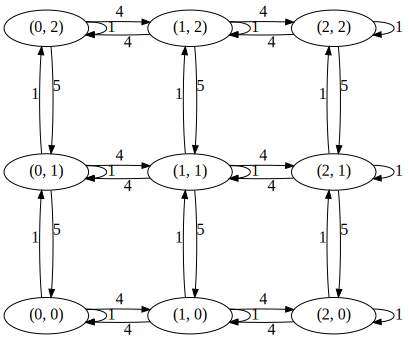

In [16]:
nw.resource_network.plot(scale=2.)

Здесь интересно обратиться вновь к нумерации вершин:

In [17]:
nw.resource_network.idx_descriptor

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

Как можно видеть, в губковых сетях вершины -- пары натуральных чисел

#### Симуляции в губковых сетях

`sn.SpongeNetwork` предоставляет специальный интерфейс для запуска симуляции

In [18]:
sim = nw.run_sponge_simulation([10, 0, 20], n_iters=10)
sim

StateArray(node_descriptor={(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 0): 3, (1, 1): 4, (1, 2): 5, (2, 0): 6, (2, 1): 7, (2, 2): 8}, idx_descriptor=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)], states_arr=array([[ 0.        ,  0.        , 10.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 20.        ],
       [ 0.        ,  5.        ,  1.        ,  0.        ,  0.        ,
         8.        ,  0.        ,  5.        , 11.        ],
       [ 2.        ,  1.        ,  3.55384615,  0.        ,  5.89230769,
         5.        ,  2.        ,  6.        ,  4.55384615],
       [ 1.        ,  4.01660562,  2.23076923,  3.34725275,  4.53846154,
         4.06398046,  3.5       ,  4.57216117,  2.73076923],
       [ 3.55152625,  2.69474969,  2.24442378,  4.26373626,  5.0747666 ,
         2.56898657,  3.82930403,  3.47252747,  2.29997934],
       [ 3.2979243 ,  3.36587082,  1.65224007,  6.75993801,  3.6330046 ,
         2.42190059,  3.68681

Разница с функцией `sn.SpongeNetwork.resource_network.run_simulation` состоит в том, что здесь передаются начальные состояния только для верхних вершин, а не для всех

Для отрисовки симуляции тоже есть отдельная функция:

In [19]:
nw.plot_simulation(sim, scale=1.4)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=9), Output(layout=Layout(height='32…

Можно обратиться к обычной функции `sn.SpongeNetwork.resource_network.run_simulation`, передав начальные данные в виде (возможно, неполного) словаря:

In [20]:
sim = nw.resource_network.run_simulation({
        (1, 1): 10,
        (2, 0): 40
    },
    n_iters=10)
nw.plot_simulation(sim, scale=1.4)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=9), Output(layout=Layout(height='32…

#### Изменение губковых сетей

Изменить губковую сеть напрямую невозможно: это вызвало бы рассогласованность элементов объекта класса `sn.SpongeNetwork`. Для изменения предусмотрен специальный интерфейс, а именно функция `sn.SpongeNetwork.altered`. Основным параметром данной функции является функция (callback), изменяющая граф. Пример такой функции представлен ниже:

In [21]:
def callback(G: nx.DiGraph) -> nx.DiGraph:
    G.add_node((3, 1), pos=(3.2, 1.4))
    G.add_edges_from([
        ((3, 1), (2, 1), {"weight": 3}),
        ((2, 1), (3, 1), {"weight": 2})
    ])
    return G

Как можно видеть из сигнатуры данной функции, она принимает на вход граф и возвращает тоже граф. Входящий граф -- низлежащий граф исходной губковой сети, который обладает всеми теми же параметрами: вершинами, ребрами, весами, положениями и тп. Предполагается, что callback будет менять данный граф и возвращать измененную версию. В данном случае callback добавляет вершину $(3, 1)$, а также связывает ее с вершиной $(2, 1)$

Обратим внимание на то, что у вершины прописывается параметр `pos` -- координаты ее на геометрической плоскости. Этот параметр крайне важен для корректной визуализации. Если хотя бы у одной вершины в результирующем графе не будет параметра `pos`, то весь граф будет рисоваться некорректно. Кроме того, для каждого нового ребра указывается его вес. Если у какого-то ребра не будет указан вес, то он будет выставлен рандомно.

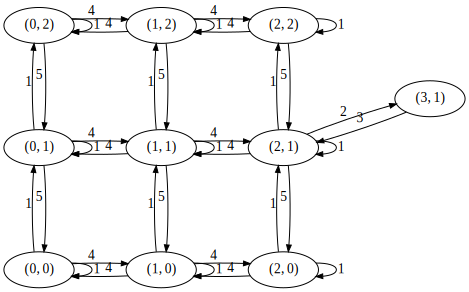

In [22]:
new_network = nw.altered(callback)
new_network.resource_network.plot()

Внимание: функция `sn.SpongeNetwork.altered` не меняет старую губковую сеть, а возвращает новую. Старая при этом остается нетронутой, ей можно пользоваться дальше

Можно также, например, убрать лишнюю вершину или ребро:

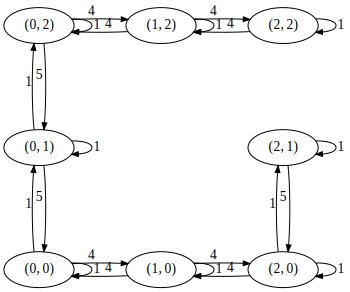

In [23]:
def callback(G: nx.DiGraph) -> nx.DiGraph:
    G.remove_node((1, 1))
    G.remove_edges_from([
        ((2, 2), (2, 1)),
        ((2, 1), (2, 2))
    ])
    return G
net_with_hole = nw.altered(callback)
net_with_hole.resource_network.plot()

## Фактор-сети

Теперь sponge_networks позволяет оперировать и фактор-сетями, то есть ресурсными сетями на основе фактор-графов. В таких графах некоторые вершины отождествляются и ведут себя как единая вершина, которая "наследует" все связи "родителей". Для задания фактор-сети требуется указать некоторое отношение эквивалентности между вершинами. А именно, предоставить набор из наборов вершин, которые будут в ходе данной операции отождествляться.

Для примера рассмотрим сеть с "дыркой" из примера выше. Мы можем "замкнуть" ее, отождествив, например, вершины `(2, 2)` и `(2, 1)`. И вдобавок, например, отождествим соседние вершины `(0, 2)` и `(0, 1)`.

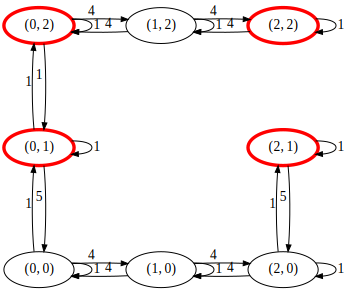

In [24]:
qn_without_hole = sn.QuotientNetwork(net_with_hole.resource_network, [
    [(2, 2), (2, 1)],
    [(0, 2), (0, 1)],
])
qn_without_hole.plot()

Можно посмотреть, что у получившейся ресурсной сети, соответствующей данной фактор-сети (а именно `qn_without_hole.quotient_network`; к ней нам и стоит обращаться, когда мы хотим узнать некоторые свойства фактор-сети как ресурсной сети / графа) теперь не 8 вершин, а 6. Теперь вершинами являются не только пары натуральных чисел, но и "замороженные" множества `frozenset` из этих пар:

In [25]:
qn_without_hole.quotient_network.G.nodes()

NodeView((frozenset({(2, 1), (2, 2)}), frozenset({(0, 1), (0, 2)}), (0, 0), (1, 0), (1, 2), (2, 0)))

Как можно видеть, вершины, которые были отождествлены, покрашены в красный. Конечно, лучше бы красить вершины из разных классов эквивалентности в разные цвета, но такого функционала пока нет.

Здесь следует отметить, что теперь оба ребра между "вершинами" `(0, 2)` и `(0, 1)` имеют вес, равный 1. На самом деле, это лишь индикатор того, что у получившейся "объединенной" вершины есть петля, которая имеет вес 1.

Будем говорить, что вершина является _"отождествленной"_, если в процессе факторизации она попала в некоторое множество из более чем одного элемента, и _"неотождествленной"_ в противном случае.

Определим более формально, как расчитывается, как проводить ребра между вершинами в процессе факторизации:

- ребро между произвольной парой неотождествленных вершин остается неизменным;
- для отождествленной вершины $u$:
  - петля проводится если хотя бы у одной вершины в классе эквивалентности $u$ есть петля; вес петли есть среднее между весами всех петель вершин данного класса;
  - ребро из $u$ в $v$ проводится, если между классами вершин $u$ и $v$ (либо между классом $u$ и вершиной $v$, если $v$ -- неотождествленная) было хотя бы одно ребро (из какой-то вершины $u$ в какую-то вершину $v$); вес ребра есть среднее между весами всех ребер из $u$ в $v$;
  - с ребром из $v$ в $u$ ситуация симметричная;
- таким образом, новых ребер не добавляется

Также заметим, что на вход конструктору `QuotientNetwork` подавалась не губковая сеть, а соответствующая ей обычная (`net_with_hole.resource_network`)

In [26]:
qn_without_hole.quotient_network

ResourceNetworkGreedy(adjacency_matrix=array([[1, 0, 0, 0, 4, 5],
                                              [0, 1, 5, 0, 4, 0],
                                              [0, 1, 1, 4, 0, 0],
                                              [0, 0, 4, 1, 0, 4],
                                              [4, 4, 0, 0, 1, 0],
                                              [1, 0, 0, 4, 0, 1]]),
                      idx_descriptor=[frozenset({(2, 1), (2, 2)}),
                                      frozenset({(0, 1), (0, 2)}),
                                      (0, 0),
                                      (1, 0),
                                      (1, 2),
                                      (2, 0)])

Симуляции на фактор-сети запускать можно так же, как и на обычной. Предположим, что мы хотим положить 20 единиц ресурса в вершину `(1, 2)`, а остальные оставить пустыми:

In [27]:
qn_sim = qn_without_hole.quotient_network.run_simulation({(1, 2): 20}, n_iters=30)
qn_without_hole.plot_simulation(qn_sim, scale=1.5)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=29), Output(layout=Layout(height='3…

Как можно видеть, картина получается полностью симметричная: ведь на самом деле, фактор-сеть симметричная. А вот как лучше отображать ребра фактор-сети -- мне пока не очень ясно.



Внимательный читатель уже наверняка обратил внимание на то, что мы инода обращаемся к `QuotientNetwork` напрямую, иногда к `QuotientNetwork.quotient_network`, а иногда и к `QuotientNetwork.original_network`, что, конечно, вызывает некоторое недоразумение. В сущности, с точки зрения программирования, `QuotientNetwork` -- просто некоторый объект, который содержит в себе 2 обыкновенных ресурсных сети: `original_network` есть собственно та сеть, которая подавалась в конструктор `QuotientNetwork`, `quotient_network` -- обычная ресурсная сеть, в которой, относительно `original_network`, переделаны некоторые вершины и ребра. Зачем же нужен сам объект `QuotientNetwork`, раз уже есть `quotient_network`? На самом деле, это нужно в первую очередь для рисования: `quotient_network` не может быть нарисована, ведь у отождествленных вершин нет положения на плоскости (действительно, какие координаты им задать?). Поэтому `QuotientNetwork` и занимается тем, что фактор-сеть, опираясь на информацию об исходной сети.

В качестве дополнительных функций, `QuotientNetwork` обладает возможностью преобразовывать симуляцию так, как будто бы она происходила на исходной сети (вершинам из одного класса эквивалентности в один момент времени соответствует, очевидно, одинаковый ресурс):

In [28]:
qn_without_hole.convert_simulation(qn_sim)

StateArray(node_descriptor={(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 0): 3, (1, 2): 4, (2, 0): 5, (2, 1): 6, (2, 2): 7}, idx_descriptor=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)], states_arr=array([[ 0.        ,  0.        ,  0.        ,  0.        , 20.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  4.        ,  4.        ,  0.        , 12.        ,
         0.        ,  4.        ,  4.        ],
       [ 1.66666667,  5.        ,  5.        ,  0.        ,  6.66666667,
         1.66666667,  5.        ,  5.        ],
       [ 3.22222222,  3.96666667,  3.96666667,  1.06666667,  4.55555556,
         3.22222222,  3.96666667,  3.96666667],
       [ 2.68148148,  3.22222222,  3.22222222,  4.55555556,  3.63703704,
         2.68148148,  3.22222222,  3.22222222],
       [ 4.01234568,  2.65481481,  2.65481481,  3.69037037,  2.97530864,
         4.01234568,  2.65481481,  2.65481481],
       [ 3.26452675,  2.59012346,  2.59012346,  5.81975309,  2.47

Более того, некоторые интересные свойства находятся в классе `_QuotientProperties`:

In [29]:
[prop for prop in dir(qn_without_hole.quotient_properties) if not prop.startswith("__")]

['_check_quotient_constraints',
 '_is_protocol',
 'all_quotient_nodes',
 'cast_to_set',
 'nonquotient_nodes',
 'quotient_entry',
 'quotient_nodes_sets']

### Губковые фактор-сети

Для губковых фактор-сетей тоже предусмотрен отдельный класс. Теперь на вход в конструктор стоит подавать губковую сеть, а не обычную:

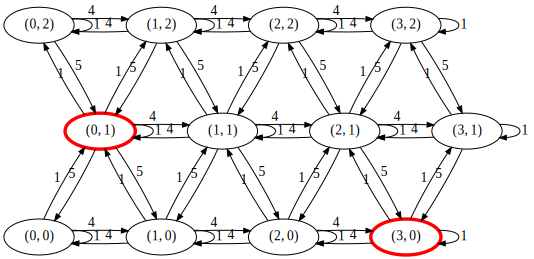

In [30]:
nw = sn.build_sponge_network(
    grid_type="triangular", n_cols=6, n_rows=2,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 4,
        "weights_up_down": 5,
        "weights_down_up": 1,
        "generate_sinks": False,
    },
)
qn_sponge = sn.QuotientSpongeNetwork(nw, [[(0, 1), (3, 0)]])
qn_sponge.quotient_network.plot()

Опять же, в чем смысл вводить новый класс? `QuotientSpongeNetwork`, в отличие от `QuotientNetwork`, обладает информацией об исходной губковой сети (`QuotientSpongeNetwork.original_sponge_network`). Сверх того, она занимается упорядочиванием "верхних" и стоковых вершин, так что если, например, некоторые верхние вершины были отождествлены, то и количество верхних вершин изменится соответственно.

Покажем, как проводить симуляции и рисовать такие сети:

In [31]:
qn_sponge_sim = qn_sponge.quotient_sponge_network.run_sponge_simulation([5, 5, 5, 0])
qn_sponge.quotient_network.plot_simulation(qn_sponge_sim, scale=1.5)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=29), Output(layout=Layout(height='3…

#### Губковые сети на цилиндре

Наконец, рассмотрим, как легко определять такие отношения эквивалентности, которые отождествляют крайние левые и крайне правые вершины сети так, чтобы сеть оказывалась на цилиндре. Для этого достаточно воспользоваться следующей функцией:

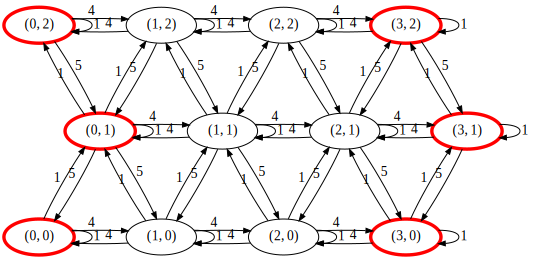

In [32]:
qn_on_cyclinder = sn.quotient_sponge_network_on_cylinder(nw)
qn_on_cyclinder.quotient_network.plot()

In [33]:
qn_sponge_sim = qn_on_cyclinder.quotient_sponge_network.run_sponge_simulation([5, 5, 0])
qn_on_cyclinder.quotient_network.plot_simulation(qn_sponge_sim, scale=1.5)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=29), Output(layout=Layout(height='3…

Из вызова функции `qn_on_cyclinder.quotient_sponge_network.run_sponge_simulation` видно, что верхних вершин стало на одну меньше.